## Load output from prtc script

This loads and displays some example data csvs (files in `example_data/save_tracking_prtc`), which was generated by running `only_rotary_teensy_prtc.ino` on the teensy and recording with `save_tracking_prtc.py`.<br>
The data were recorded while feeding in a ~10Hz sync time pulse into the sync in of the teensy, i.e. the sync "pseudo random time code" signals in this data should be completely regular.  

In [1]:
import datetime
import numpy as np
import pandas as pd 
from IPython.display import display

from matplotlib import pyplot as plt
# Make plots prettier
%config InlineBackend.figure_format = 'retina'

In [2]:
# Files 
file_pos1 = 'save_tracking_prtc/20-21-09_01-13-2023.csv'
file_sync1 = 'save_tracking_prtc/20-21-09_01-13-2023_sync.csv'

file_pos2 = 'save_tracking_prtc/20-23-22_01-13-2023.csv'
file_sync2 = 'save_tracking_prtc/20-23-22_01-13-2023_sync.csv'

In [3]:
def plot_quick_summary(pos_file, sync_file):
    pos_data1 = pd.read_csv(pos_file, header=4)
    sync_data1 = pd.read_csv(sync_file, header=4)

    # Total time? 
    elapsed_time_str = str(datetime.timedelta(seconds=pos_data1.timestamp.iloc[-1]/1000.)) # Give it some nice formatting
    print(f'Total time (H:M:S:MS) {elapsed_time_str}\n')

    # Show example excerpt
    display(pos_data1.head())

    print('\n')
    # Draw figure
    figure = plt.figure(figsize=(7,6))
    gs = figure.add_gridspec(nrows=2, ncols=2, hspace=.3)

    ax1 = figure.add_subplot(gs[0, 0])
    ax1.plot(sync_data1.timestamp,'k')
    ax1.set_title('Sync timestamps')

    ax2 = figure.add_subplot(gs[0, 1])
    ax2.hist(np.diff(sync_data1.timestamp), bins=np.arange(0,250,1), color='k');
    ax2.set_yscale('log')
    ax2.set_title('Hist. of sync timestamp differences')

    ax3 = figure.add_subplot(gs[1, :])
    ax3.plot(pos_data1.timestamp, pos_data1.position, 'k')
    for no, interrupt in enumerate(pos_data1.timestamp[pos_data1.interrupt>0].values):
        ax3.axvline(x=interrupt, color='cornflowerblue', alpha=.7, label='Beam interrupts')
        if not no: plt.legend()

    ax3.set_xlabel('Time (teensy timer) [ms]')
    ax3.set_ylabel('Wheel position [AU]')
    ax3.set_title('Wheel position over time')

### Show examples ... 

Total time (H:M:S:MS) 0:02:10.440000



,timestamp_sys,timestamp,position,interrupt,position_at_interrupt
0,2023-01-13_20:21:09.177034,0,0,0,0
1,2023-01-13_20:21:09.197060,20,0,0,0
2,2023-01-13_20:21:09.217153,40,0,0,0
3,2023-01-13_20:21:09.237063,60,0,0,0
4,2023-01-13_20:21:09.256980,80,0,0,0


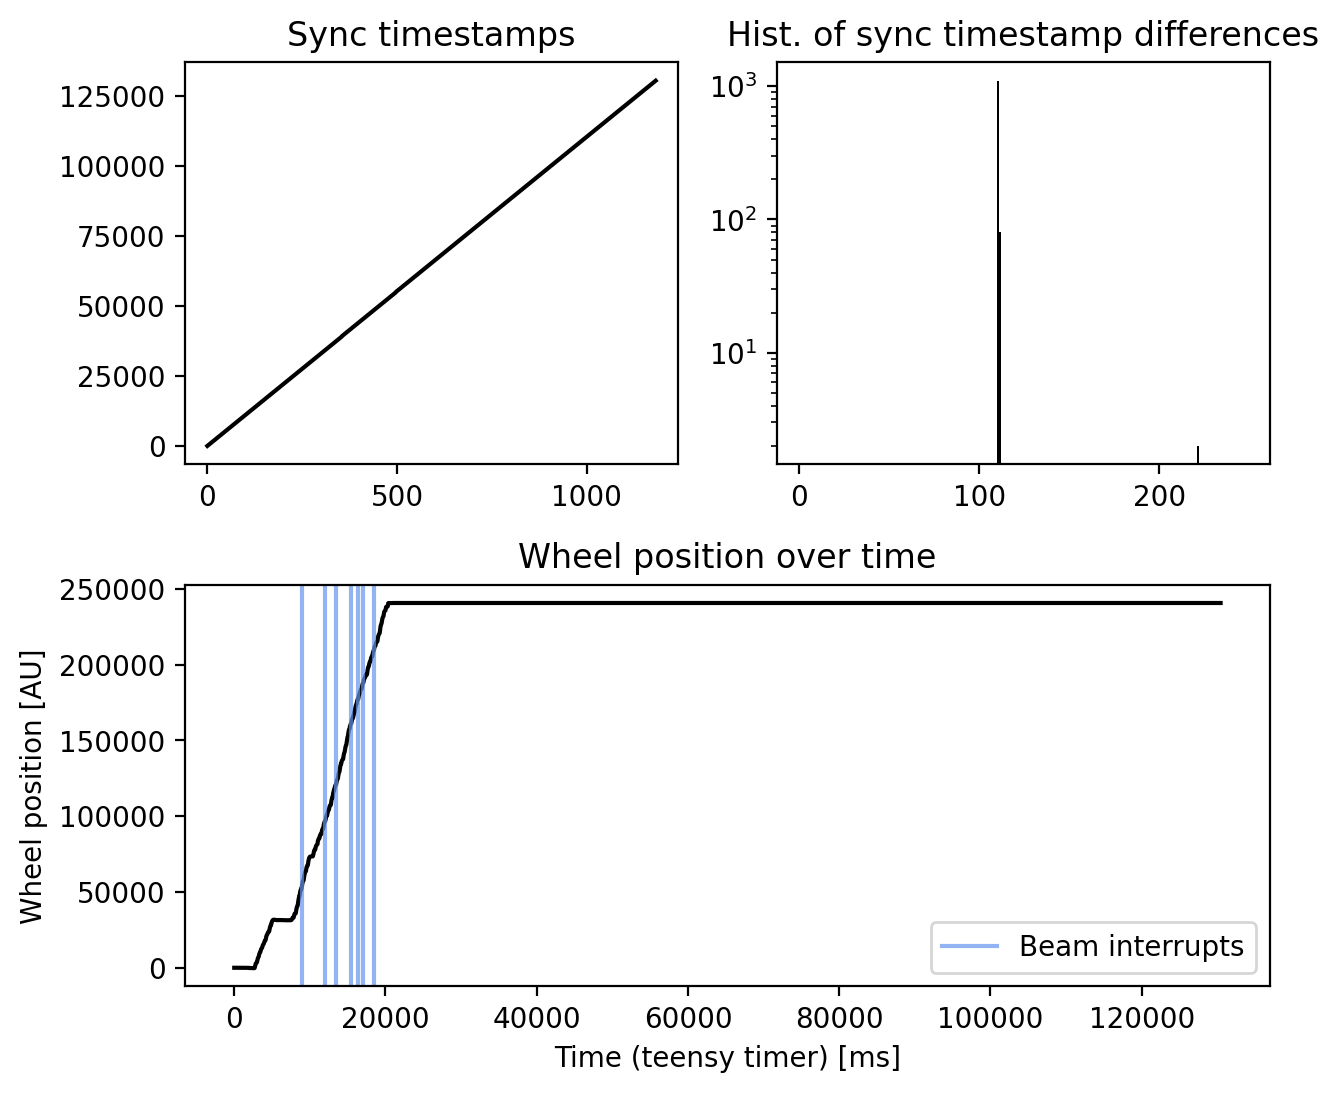

In [4]:
plot_quick_summary(file_pos1, file_sync1)

Total time (H:M:S:MS) 0:01:31.780000



,timestamp_sys,timestamp,position,interrupt,position_at_interrupt
0,2023-01-13_20:23:22.548341,0,240613,0,209376
1,2023-01-13_20:23:22.567177,20,240613,0,209376
2,2023-01-13_20:23:22.587314,40,240613,0,209376
3,2023-01-13_20:23:22.607338,60,240613,0,209376
4,2023-01-13_20:23:22.627451,80,240613,0,209376


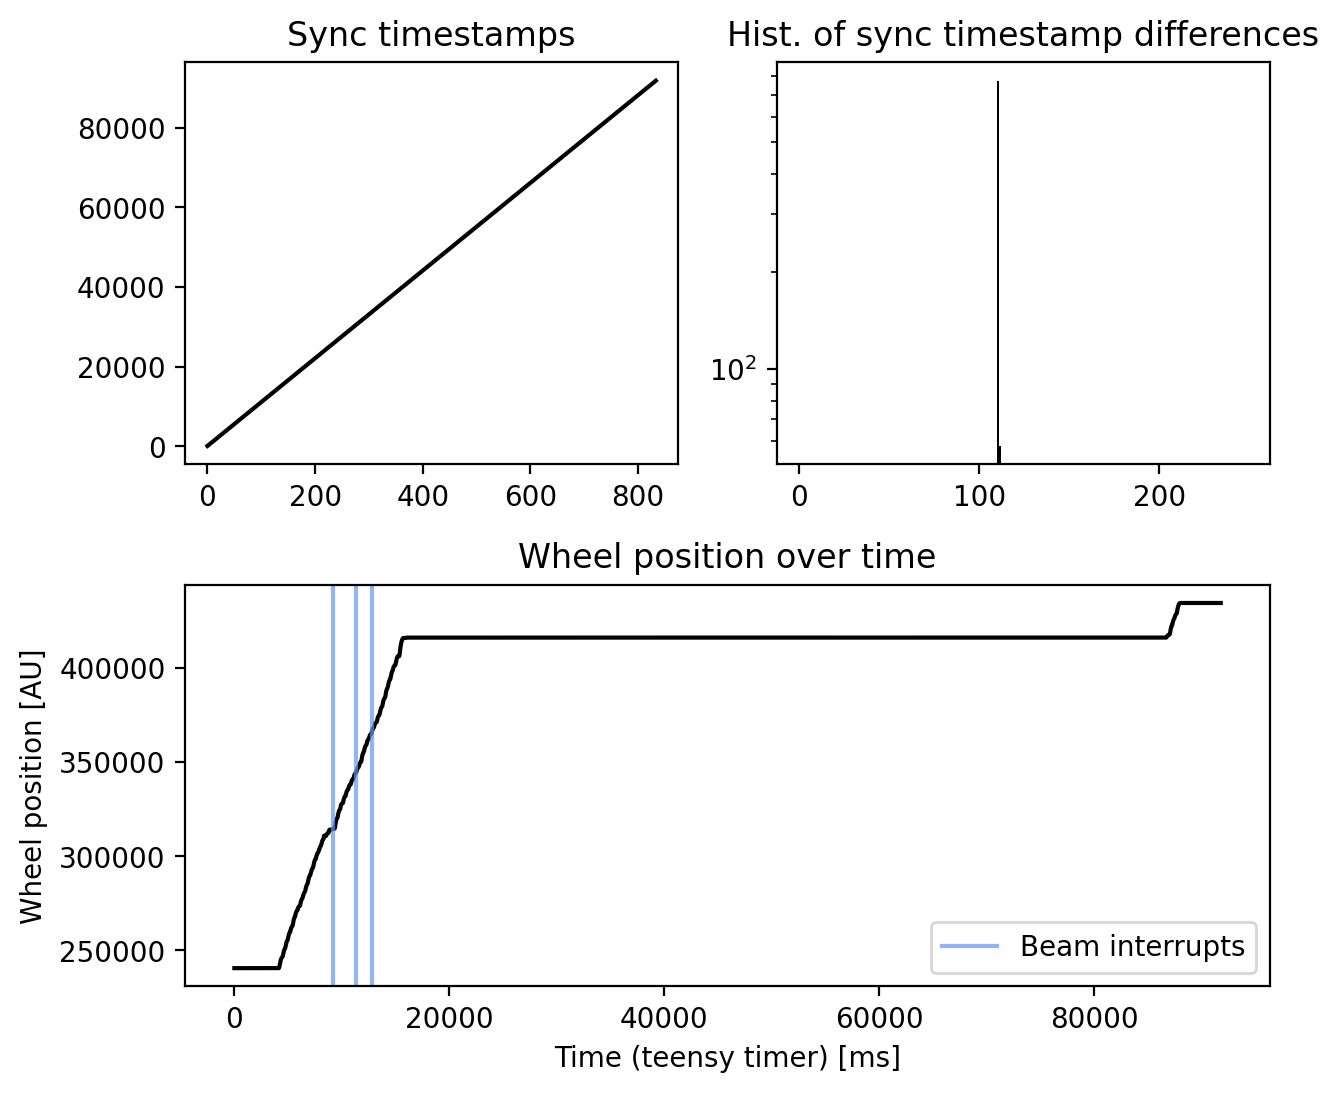

In [5]:
plot_quick_summary(file_pos2, file_sync2)